In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib.pyplot import figure
import calendar

In [3]:
file = Path("resources/18100205.csv")
file_df = pd.read_csv(file)
file_df = file_df[file_df['GEO'].str.endswith('Ontario')]
file_df = file_df[(file_df['REF_DATE'] > "2020-12-31") & (file_df['REF_DATE']< "2023-07-26")]
file_df = file_df[file_df["New housing price indexes"].str.contains("Land only|Total") == False]
file_df = file_df.drop(columns=['UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','STATUS','SYMBOL','TERMINATED','DECIMALS'])
file_df = file_df.dropna(subset=["VALUE"])
file_df

,REF_DATE,GEO,DGUID,New housing price indexes,COORDINATE,VALUE
57649,2021-01,Ontario,2016A000235,House only,17.2,113.0
57655,2021-01,"Oshawa, Ontario",2011S0503532,House only,19.2,111.0
57658,2021-01,"Toronto, Ontario",2011S0503535,House only,20.2,103.9
57661,2021-01,"Hamilton, Ontario",2011S0503537,House only,21.2,120.9
57664,2021-01,"St. Catharines-Niagara, Ontario",2011S0503539,House only,22.2,116.7
...,...,...,...,...,...,...
61147,2023-06,"Kitchener-Cambridge-Waterloo, Ontario",2011S0503541,House only,23.2,153.5
61150,2023-06,"Guelph, Ontario",2011S0503550,House only,24.2,132.7
61153,2023-06,"London, Ontario",2011S0503555,House only,25.2,152.5
61156,2023-06,"Windsor, Ontario",2011S0503559,House only,26.2,146.2


In [4]:
file_df['year'] = pd.DatetimeIndex(file_df['REF_DATE']).year
file_df['month'] = pd.DatetimeIndex(file_df['REF_DATE']).month
file_df['months'] = file_df['month'].apply(lambda x: calendar.month_name[x])
file_df = file_df.drop(columns=["month"])
file_df

,REF_DATE,GEO,DGUID,New housing price indexes,COORDINATE,VALUE,year,months
57649,2021-01,Ontario,2016A000235,House only,17.2,113.0,2021,January
57655,2021-01,"Oshawa, Ontario",2011S0503532,House only,19.2,111.0,2021,January
57658,2021-01,"Toronto, Ontario",2011S0503535,House only,20.2,103.9,2021,January
57661,2021-01,"Hamilton, Ontario",2011S0503537,House only,21.2,120.9,2021,January
57664,2021-01,"St. Catharines-Niagara, Ontario",2011S0503539,House only,22.2,116.7,2021,January
...,...,...,...,...,...,...,...,...
61147,2023-06,"Kitchener-Cambridge-Waterloo, Ontario",2011S0503541,House only,23.2,153.5,2023,June
61150,2023-06,"Guelph, Ontario",2011S0503550,House only,24.2,132.7,2023,June
61153,2023-06,"London, Ontario",2011S0503555,House only,25.2,152.5,2023,June
61156,2023-06,"Windsor, Ontario",2011S0503559,House only,26.2,146.2,2023,June


In [6]:
file_df = file_df.pivot(index="months", columns = ["year","GEO"], values = "VALUE")
file_df

year         2021                                                     \
GEO       Ontario Oshawa, Ontario Toronto, Ontario Hamilton, Ontario   
months                                                                 
April       118.3           114.0            107.1             120.9   
August      122.9           121.3            108.9             120.9   
December    126.9           124.2            112.2             120.9   
February    114.0           114.0            104.7             120.9   
January     113.0           111.0            103.9             120.9   
July        121.4           121.0            107.8             120.9   
June        120.7           114.0            107.5             120.9   
March       115.7           114.0            105.7             120.9   
May         119.9           114.0            107.3             120.9   
November    126.5           124.2            112.2             120.9   
October     125.1           123.8            110.6             120.9   
September   123.4           124.6            108.9             120.9   

year                                       \
GEO       St. Catharines-Niagara, Ontario   
months                                      
April                               124.4   
August                              126.7   
December                            130.3   
February                            117.0   
January                             116.7   
July                                126.7   
June                                126.7   
March                               121.7   
May                                 124.8   
November                            129.6   
October                             129.6   
September                           127.3   

year                                                             \
GEO       Kitchener-Cambridge-Waterloo, Ontario Guelph, Ontario   
months                                                            
April                                     123.6           128.9   
August                                    133.3           132.8   
December                                  149.2           134.1   
February                                  120.7           126.4   
January                                   118.5           119.2   
July                                      133.9           132.8   
June                                      132.4           132.8   
March                                     122.6           127.2   
May                                       131.4           128.9   
November                                  143.7           134.0   
October                                   140.5           132.8   
September                                 134.2           132.8   

year                                                                 ...  \
GEO       London, Ontario Windsor, Ontario Greater Sudbury, Ontario  ...   
months                                                               ...   
April               128.5            128.1                    118.6  ...   
August              142.6            133.3                    121.4  ...   
December            151.2            139.0                    121.7  ...   
February            126.0            116.3                    107.7  ...   
January             125.5            115.5                    106.5  ...   
July                136.6            133.2                    121.4  ...   
June                136.5            133.0                    119.3  ...   
March               127.5            118.2                    108.2  ...   
May                 135.3            131.0                    119.3  ...   
November            151.3            138.8                    121.7  ...   
October             146.4            137.1                    120.5  ...   
September           142.6            136.9                    120.6  ...   

year         2023                                                     \
GEO       Ontario Oshawa

<Axes: xlabel='months'>

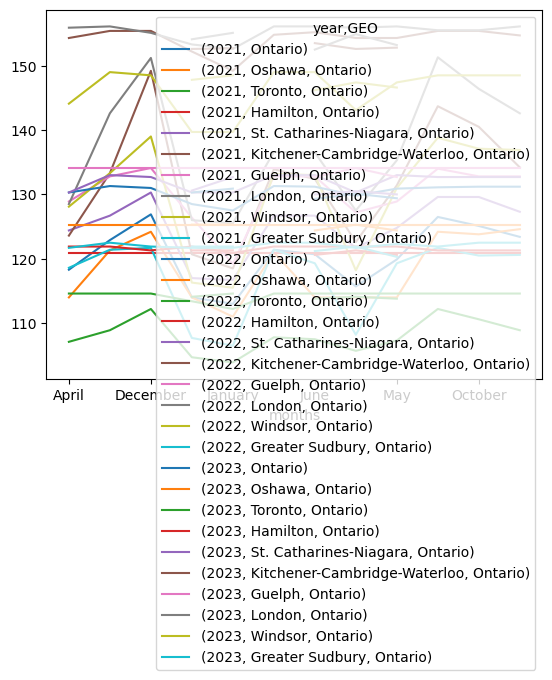

In [7]:
file_df.plot()